# Rolling window Correlation

In [ ]:
import pandas as pd
import numpy as np

# Create a date range
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate synthetic time series data
np.random.seed(42)  # for reproducibility
data1 = np.random.randn(100).cumsum() + 100
data2 = np.random.randn(100).cumsum() + 100

# Create DataFrame
df = pd.DataFrame(data={'Series1': data1, 'Series2': data2}, index=dates)
df.head()

,Series1,Series2
2020-01-01,100.496714,98.584629
2020-01-02,100.358450,98.163984
2020-01-03,101.006138,97.821269
2020-01-04,102.529168,97.018992
2020-01-05,102.295015,96.857706


## Calculate Rolling Correlation
We'll use the **rolling** method in pandas to define a window which to calculate the correlation. The **corr** method is then applied to compute the correlation between 'Series1' and 'Series2' within each window.

In [ ]:
# Set the rolling window size
window_size = 20

# Calculate rolling correlation
rolling_corr = df['Series1'].rolling(window=window_size).corr(df['Series2'])

# Print the rolling correlation
print(rolling_corr)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2020-04-05   -0.544216
2020-04-06   -0.277285
2020-04-07   -0.134548
2020-04-08    0.022194
2020-04-09    0.183601
Freq: D, Length: 100, dtype: float64


## Plotting the Roling Correlation

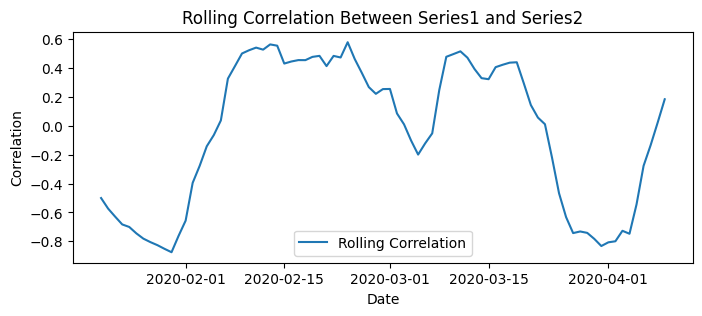

In [ ]:
import matplotlib.pyplot as plt

# Plot rolling correlation
plt.figure(figsize=(8, 3))
plt.plot(rolling_corr, label='Rolling Correlation')
plt.title('Rolling Correlation Between Series1 and Series2')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


This script sets up a simple scenario where you have two correlated time series, calculates how their correlation changes over time within a specified window, and then plots these changes. This is a useful approach for analyzing how relationships in financial data evolve over time.

# About `df['Series1'].rolling(window=window_size).corr(df['Series2'])`

In [ ]:
rolling_correlation = df['Series1'].rolling(window=window_size).corr(df['Series2'])

The method **rolling** is applied to **df['Series1'] to create a rolling window, but it might seem like **df['Series2']** is not within a rolling window. However, when calculating the correlation using the **corr()** function in this context, pandas automatically aligns both **Series1** and **Series2** to the same rolling window before calculating the correlation.

<br>
Here's what happens under the hood:

* **Rolling Window Applied**: The **rolling** method creates a rolling window object for **Series1** over the specified number of periods (**window_size**).
* **Correlation Computation**: For each position of the rolling window on **Series1**, **corr()** takes the slice of **Series1** within that window and automatically aligns it with the corresponding slice of **Series2**. Thus, both series are considered within the same rolling window when calculating the correlation.

<br>
Essentially, both **Series1** and **Series2** are confined to the same rolling window for each correlation calculation. This ensures that the correlation at any given point is based on the same subset of data from both time series, respecting the window size for both series simultaneously.


#Mmany Columns Correlations

In [1]:
import pandas as pd
import numpy as np

# Create a date range
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')

# Generate synthetic time series data for four series
np.random.seed(42)
data1 = np.random.randn(100).cumsum() + 100
data2 = np.random.randn(100).cumsum() + 100
data3 = np.random.randn(100).cumsum() + 100
data4 = np.random.randn(100).cumsum() + 100

# Create DataFrame
df = pd.DataFrame({
    'Series1': data1,
    'Series2': data2,
    'Series3': data3,
    'Series4': data4
}, index=dates)
df.head()

,Series1,Series2,Series3,Series4
2020-01-01,100.496714,98.584629,100.357787,99.171005
2020-01-02,100.358450,98.163984,100.918572,98.610824
2020-01-03,101.006138,97.821269,102.001623,99.358118
2020-01-04,102.529168,97.018992,103.055425,99.968488
2020-01-05,102.295015,96.857706,101.677756,99.947586


In [2]:
# Set the rolling window size
window_size = 20

# Initialize a DataFrame to store the rolling correlations
rolling_correlations = pd.DataFrame(index=df.index)

# Calculate rolling correlation for each pair
from itertools import combinations # combinationで各組合せを作ってくれる

for (col1, col2) in combinations(df.columns, 2):
    rolling_corr = df[col1].rolling(window=window_size).corr(df[col2])
    rolling_correlations[f'{col1}_{col2}'] = rolling_corr

# Print the rolling correlations
print(rolling_correlations)

            Series1_Series2  Series1_Series3  Series1_Series4  \
2020-01-01              NaN              NaN              NaN   
2020-01-02              NaN              NaN              NaN   
2020-01-03              NaN              NaN              NaN   
2020-01-04              NaN              NaN              NaN   
2020-01-05              NaN              NaN              NaN   
...                     ...              ...              ...   
2020-04-05        -0.544216        -0.042126         0.031617   
2020-04-06        -0.277285        -0.064595         0.026739   
2020-04-07        -0.134548        -0.035925        -0.047787   
2020-04-08         0.022194        -0.029887        -0.306064   
2020-04-09         0.183601        -0.216106        -0.340022   

            Series2_Series3  Series2_Series4  Series3_Series4  
2020-01-01              NaN              NaN              NaN  
2020-01-02              NaN              NaN              NaN  
2020-01-03              NaN

In [ ]:
for (col1, col2) in combinations(df.columns, 2):
    print(col1, col2)

Series1 Series2
Series1 Series3
Series1 Series4
Series2 Series3
Series2 Series4
Series3 Series4


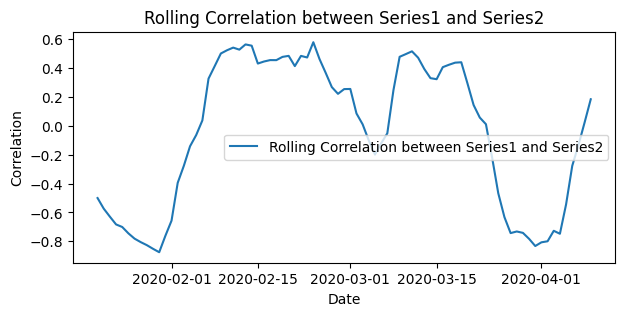

In [ ]:
import matplotlib.pyplot as plt

# Plotting example for one pair
plt.figure(figsize=(7, 3))
plt.plot(rolling_correlations['Series1_Series2'], label='Rolling Correlation between Series1 and Series2')
plt.title('Rolling Correlation between Series1 and Series2')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

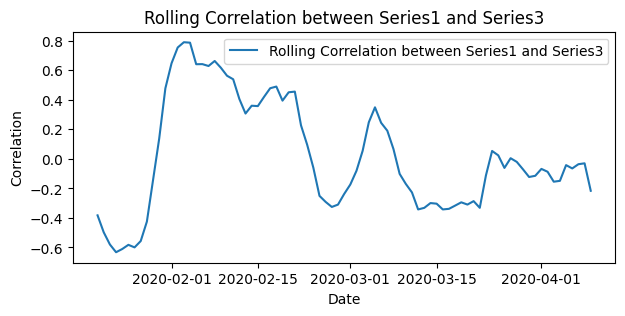

In [ ]:
# Plotting example for one pair
plt.figure(figsize=(7, 3))
plt.plot(rolling_correlations['Series1_Series3'], label='Rolling Correlation between Series1 and Series3')
plt.title('Rolling Correlation between Series1 and Series3')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

In [ ]:
rolling_correlations['Series1_Series3']

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04         NaN
2020-01-05         NaN
                ...   
2020-04-05   -0.042126
2020-04-06   -0.064595
2020-04-07   -0.035925
2020-04-08   -0.029887
2020-04-09   -0.216106
Freq: D, Name: Series1_Series3, Length: 100, dtype: float64

In [ ]:
rolling_correlations.describe()

,Series1_Series2,Series1_Series3,Series1_Series4,Series2_Series3,Series2_Series4,Series3_Series4
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,-0.045270,0.018543,-0.017907,-0.012954,0.373287,-0.171613
std,0.506963,0.382681,0.576460,0.412927,0.372805,0.484173
min,-0.875518,-0.632344,-0.949180,-0.836562,-0.462003,-0.806968
25%,-0.629440,-0.294216,-0.449174,-0.211964,0.084091,-0.557712
50%,0.056828,-0.064595,0.026739,0.117274,0.530031,-0.255897
75%,0.436896,0.357863,0.500367,0.267306,0.660857,0.025205
max,0.578426,0.790654,0.835033,0.593589,0.792845,0.873626


<Axes: >

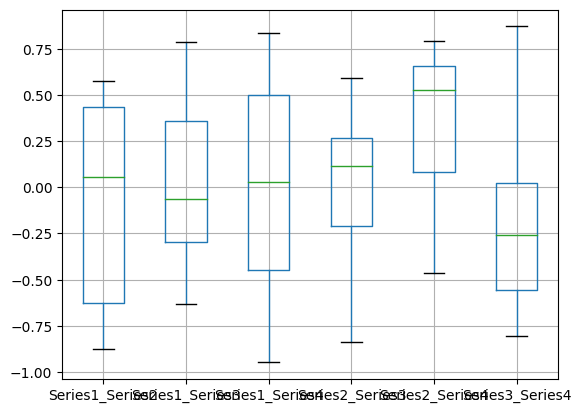

In [ ]:
rolling_correlations.boxplot()

# Heat Map of each Correlation

In [5]:
import plotly.graph_objects as go

# Prepare the data for the heat map
heat_map_data = rolling_correlations

# Create the heat map
fig = go.Figure(data=go.Heatmap(
    z=heat_map_data.T,  # Transpose to align properly
    x=heat_map_data.index,  # Dates as x-axis
    y=heat_map_data.columns,  # Correlation pairs as y-axis
    # colorscale='Viridis',  # Color scale
    colorscale=[  # Custom color scale from blue to red
        [0, 'blue'],   # Blue for the lowest values
        [1, 'red']    # Red for the highest values
    ]
))

# Update layout
fig.update_layout(
    title='Rolling Correlation Heat Map',
    xaxis_title='Date',
    yaxis_title='Series Pair',
    yaxis_autorange='reversed'  # Optional: reverse y-axis to match the correlation order
)

# Show the plot
fig.show()
